In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [58]:
train_df = pd.read_csv("train.csv")

In [59]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
train_df.shape

(891, 12)

In [61]:
train_df.isna().apply(lambda x: round(x.sum()/x.count(),3)*100)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
dtype: float64

In [62]:
train_df.duplicated().sum()

np.int64(0)

In [63]:
train_df.fillna({"Embarked": train_df.Embarked.mode()[0]},inplace=True)

In [ ]:
# More than One Ticket purchesed = Companian 1
# One Ticket purchesed = Companian 0
temp_df = train_df.Ticket.value_counts().apply(lambda x: 0 if x == 1 else 1) 
train_df["Companian"] = temp_df[train_df["Ticket"]].values

In [65]:
age_mean = round(train_df.Age.mean())
train_df.fillna({"Age": age_mean},inplace=True)

In [66]:
train_df.fillna({"Cabin": "X"},inplace=True)   # X represent NaN values
train_df.Cabin = train_df.Cabin.apply(lambda x: x[0])

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Companian    891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [68]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Companian
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,0


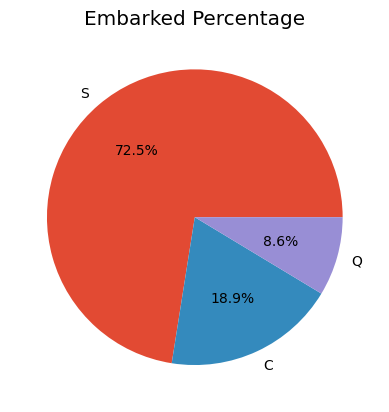

In [69]:
train_df["Embarked"].value_counts().plot(kind="pie",title="Embarked Percentage",autopct='%1.1f%%',ylabel="");

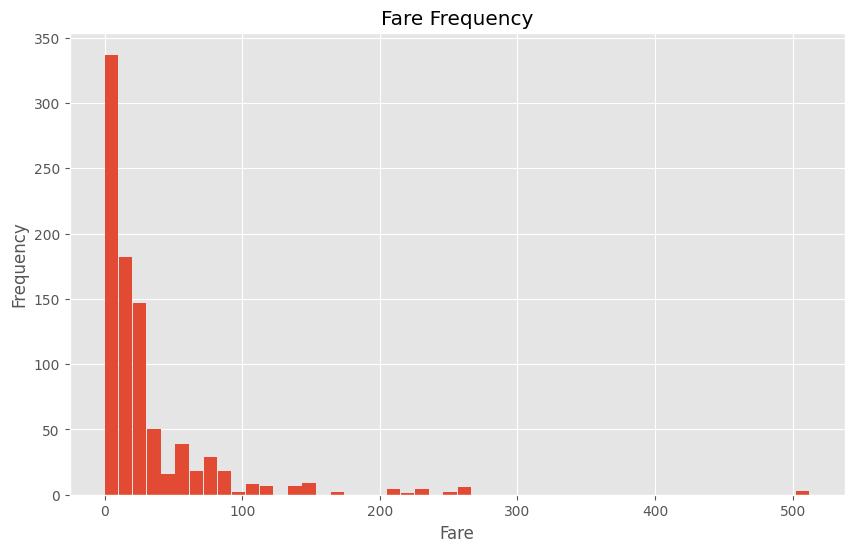

In [70]:
plt.figure(figsize=(10,6))
ax  = train_df["Fare"].plot(kind="hist",bins= 50, rwidth = 0.95,title="Fare Frequency")
ax.set_xlabel("Fare");

In [71]:
#outlier
train_df[train_df["Fare"]> 280]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Companian
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,X,C,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


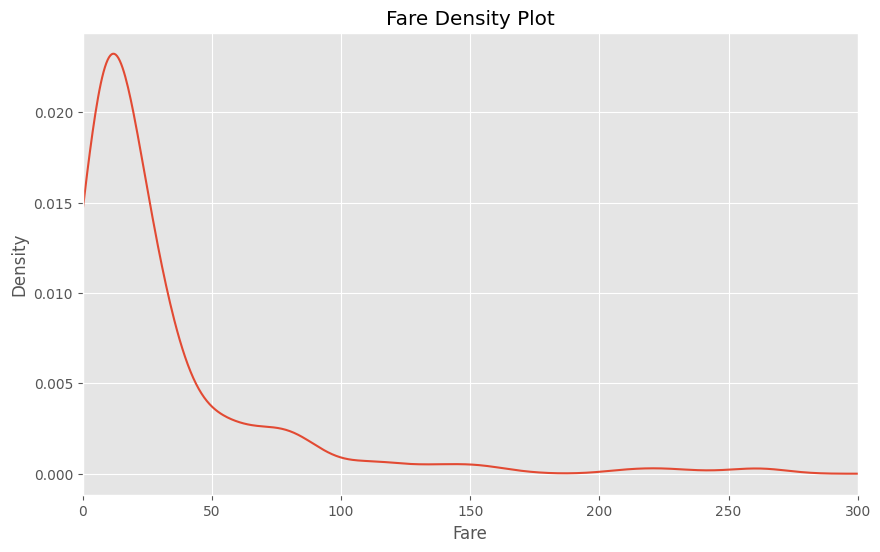

In [72]:
plt.figure(figsize=(10,6))
ax = train_df.query('Fare < 280')["Fare"].plot(kind="kde", title="Fare Density Plot",xlim=(0,300))
ax.set_xlabel("Fare");

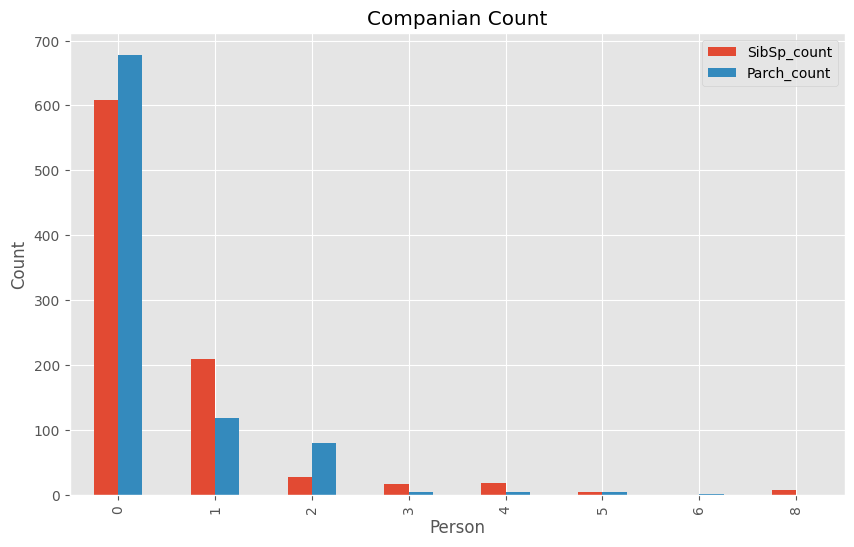

In [73]:
fig , ax = plt.subplots(figsize=(10,6))
pd.concat([train_df["SibSp"].value_counts().rename("SibSp_count"),train_df["Parch"].value_counts().rename("Parch_count")],axis=1,) \
    .fillna(0).sort_index() \
    .plot(kind="bar",title="Companian Count",ax = ax)
ax.set_ylabel("Count")
ax.set_xlabel("Person");

In [ ]:
# male = 1   , female = 0 
train_df.Sex = train_df.Sex.apply(lambda x: 1 if x == "male" else 0)

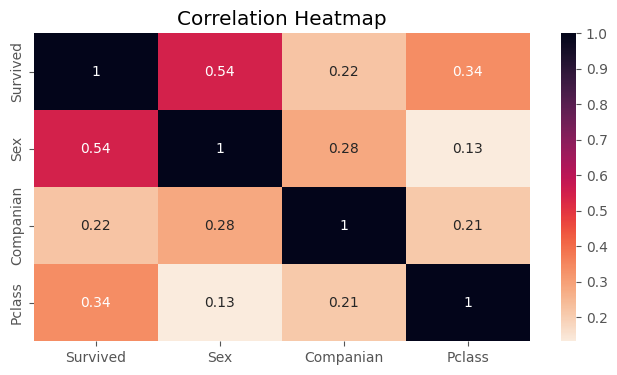

In [90]:
plt.figure(figsize=(8,4))
sns.heatmap(data= train_df[["Survived","Sex","Companian","Pclass"]].corr().abs(),annot=True,cmap = sns.color_palette("rocket_r",as_cmap=True))\
    .set(title = "Correlation Heatmap");

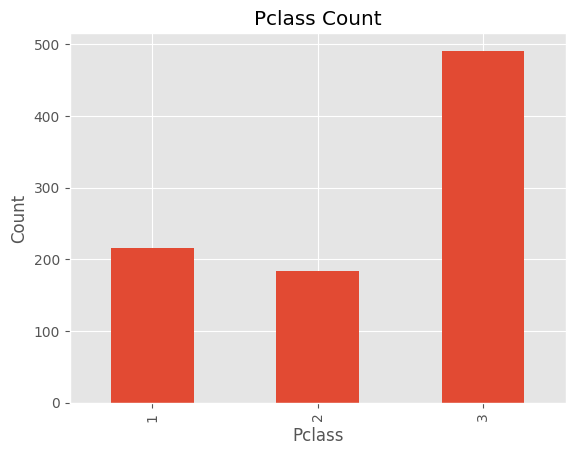

In [91]:
ax = train_df["Pclass"].value_counts().sort_index().plot(kind="bar",title="Pclass Count")
ax.set_ylabel("Count");

In [92]:
train_df["Age"].describe()

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

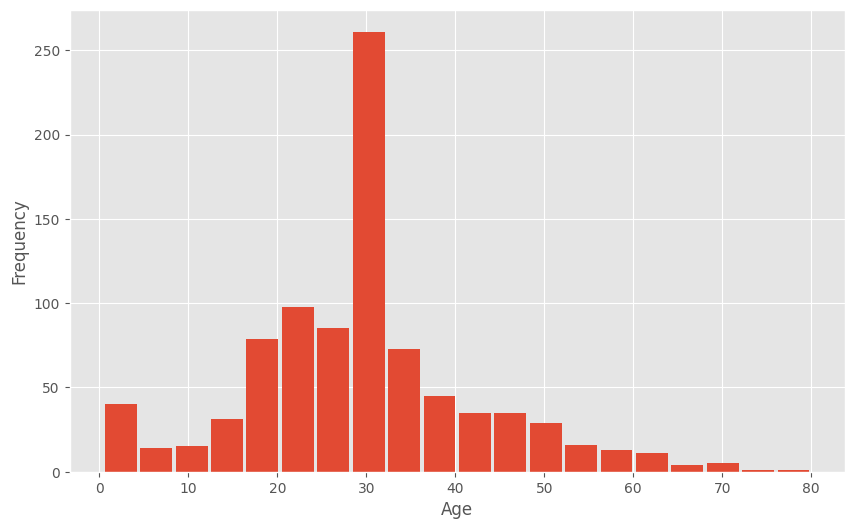

In [93]:
plt.figure(figsize=(10,6))
ax = train_df["Age"].plot(kind="hist", bins = 20,rwidth = 0.9)
ax.set_xlabel("Age");

### Age in Survival Rate

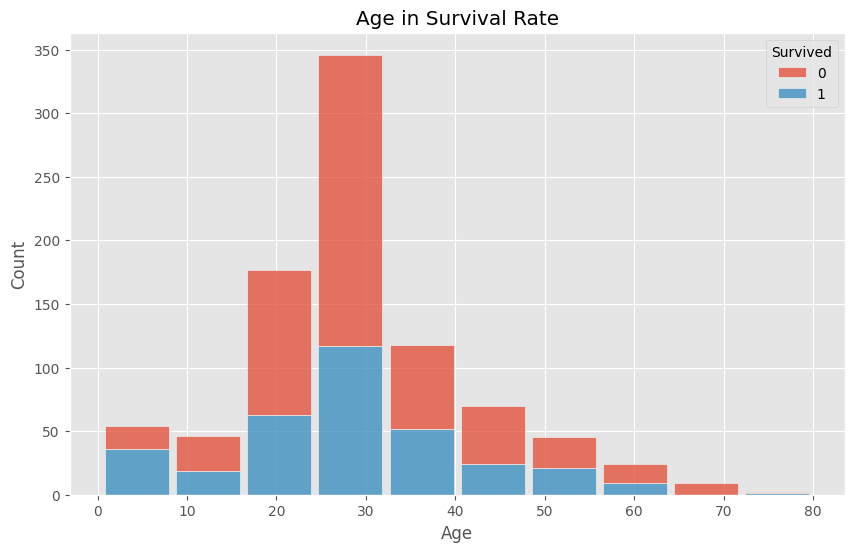

In [94]:
plt.figure(figsize=(10,6))
sns.histplot(data=train_df , x = "Age",hue= "Survived",multiple="stack",bins=10,shrink=0.9).set(title = "Age in Survival Rate");

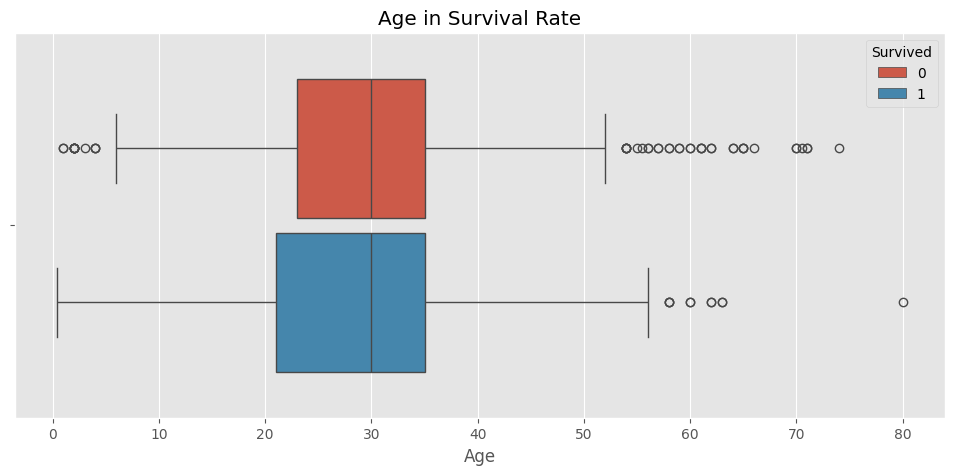

In [95]:
plt.figure(figsize=(12,5))
sns.boxplot(data=train_df , x= "Age" , hue= "Survived",gap = 0.1).set(title = "Age in Survival Rate");

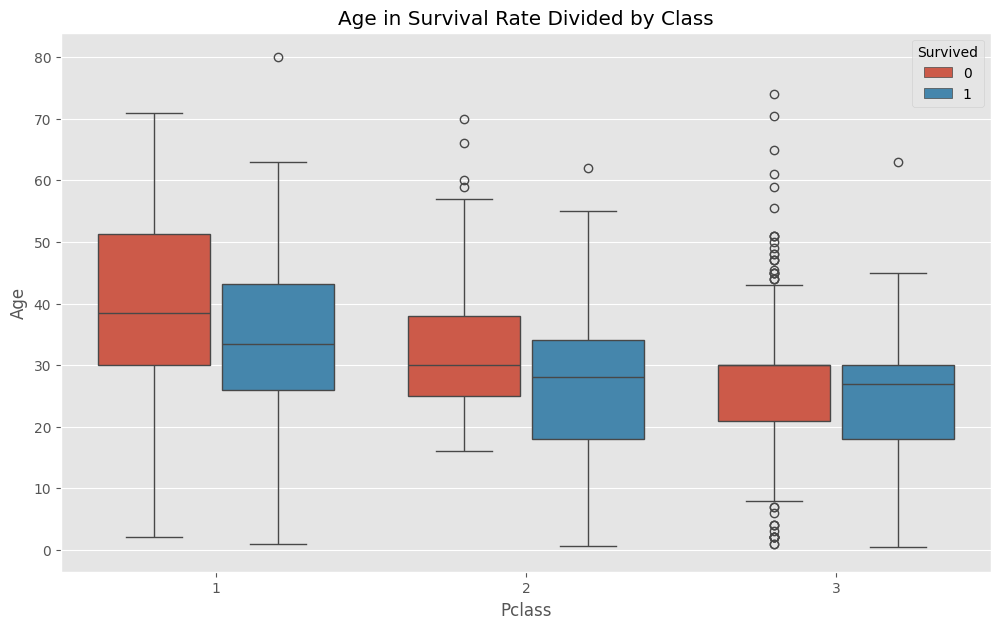

In [96]:
plt.figure(figsize=(12,7))
sns.boxplot(data=train_df , x= "Pclass" , y= "Age", hue= "Survived",gap = 0.1).set(title = "Age in Survival Rate Divided by Class");

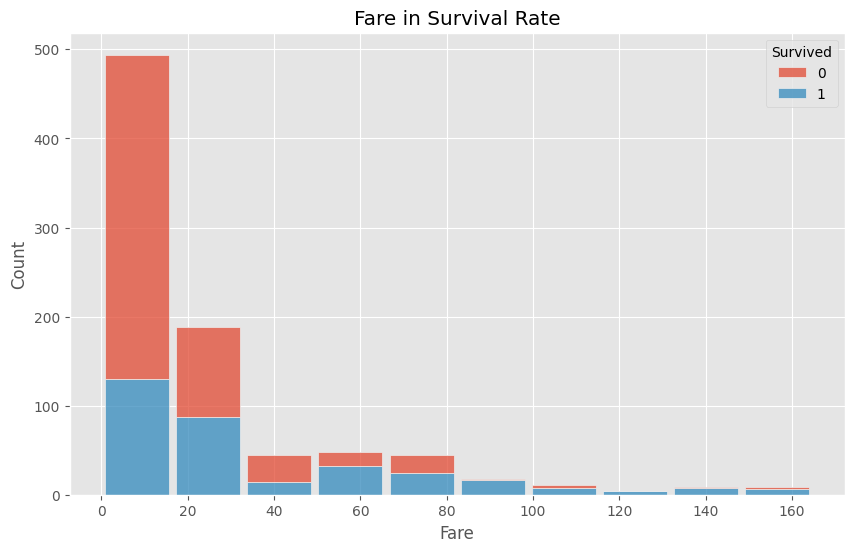

In [99]:
#after handeling a outlier 
plt.figure(figsize=(10,6))
sns.histplot(data=train_df.query('Fare<200') , x = "Fare",hue= "Survived",multiple="stack",bins=10,shrink=0.9).set(title = "Fare in Survival Rate");

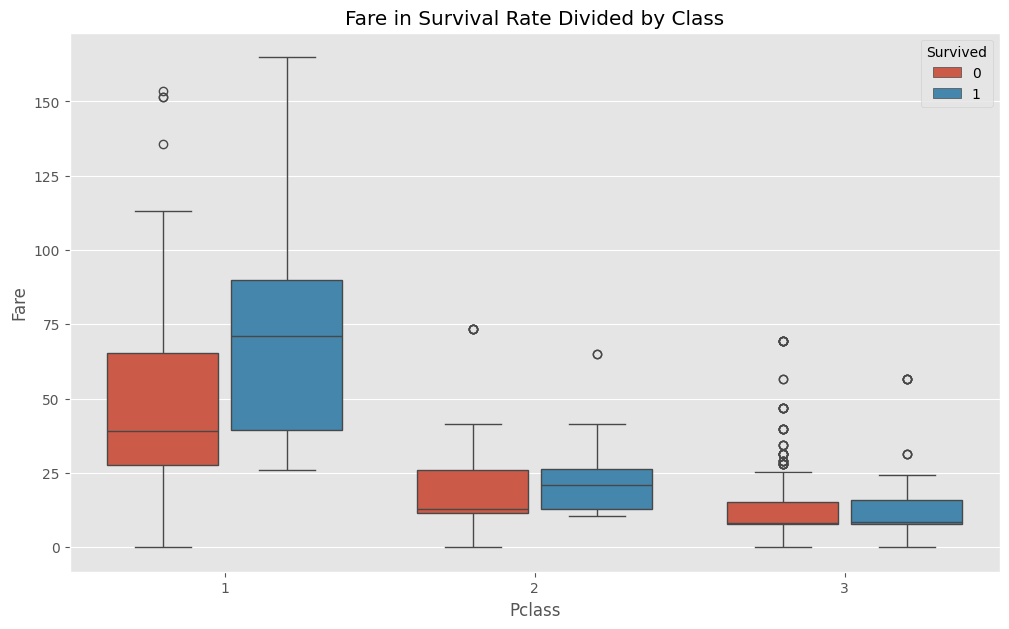

In [102]:
#after handeling a outlier 
plt.figure(figsize=(12,7))  
sns.boxplot(data=train_df.query('Fare<200') , x= "Pclass" , y= "Fare", hue= "Survived",gap = 0.1).set(title = "Fare in Survival Rate Divided by Class");

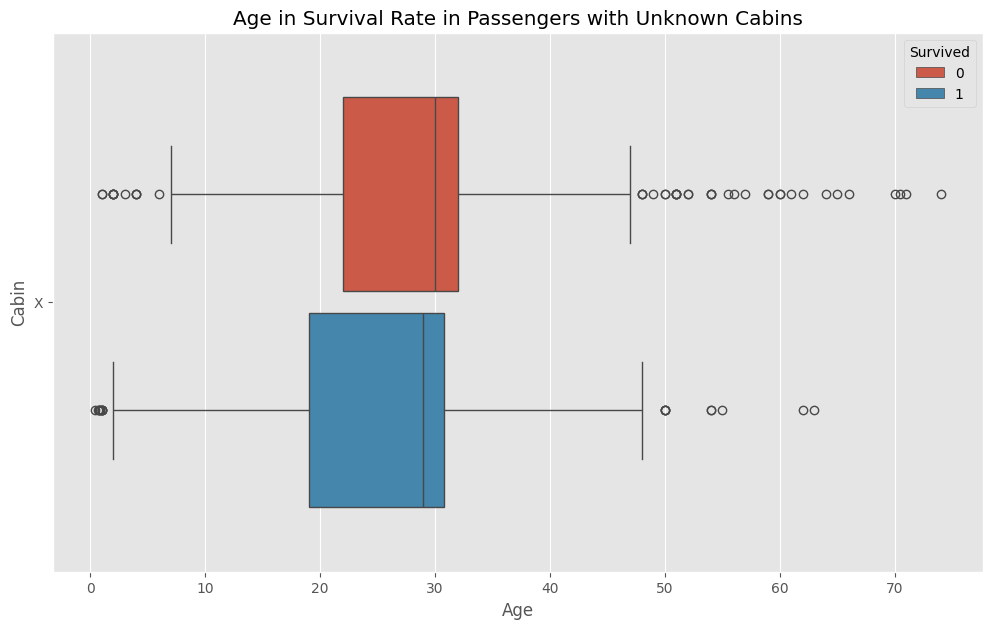

In [111]:
#Unknown Cabin
plt.figure(figsize=(12,7))
sns.boxplot(data=train_df[train_df["Cabin"] == "X"] , y= "Cabin" , x= "Age", hue= "Survived",gap = 0.1) \
    .set(title = "Age in Survival Rate in Passengers with Unknown Cabins");

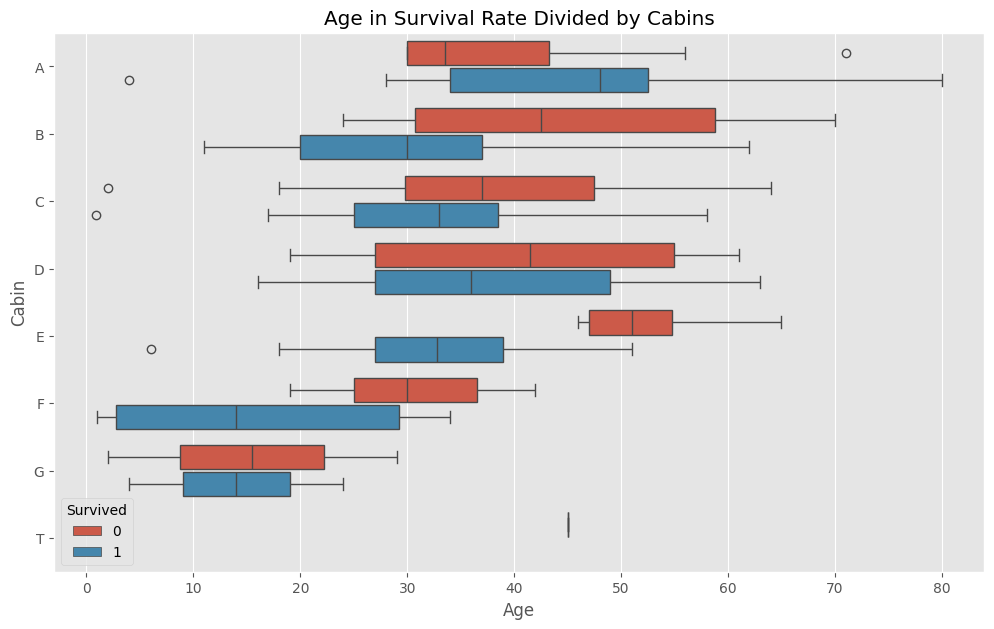

In [112]:
# Known Cabins Only
plt.figure(figsize=(12,7))
sns.boxplot(data=train_df[train_df["Cabin"] != "X"] , y= "Cabin" , x= "Age", hue= "Survived",gap = 0.1, order = train_df["Cabin"].sort_values().unique()[:8]) \
    .set(title = "Age in Survival Rate Divided by Cabins");

In [115]:
# male = 1   , female = 0 
train_df.Sex = train_df.Sex.apply(lambda x: "male" if x == 1 else "female")

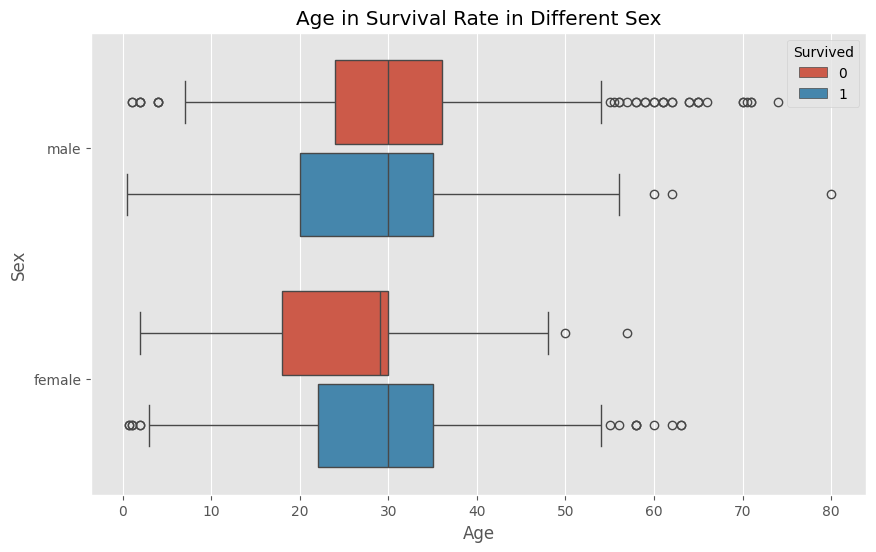

In [117]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_df , y= "Sex" , x= "Age", hue= "Survived",gap = 0.1) \
    .set(title = "Age in Survival Rate in Different Sex");